In [1]:
#kütüphaneleri içe aktaralım
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#veri setini içe aktaralım
df = pd.read_csv("KNN.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

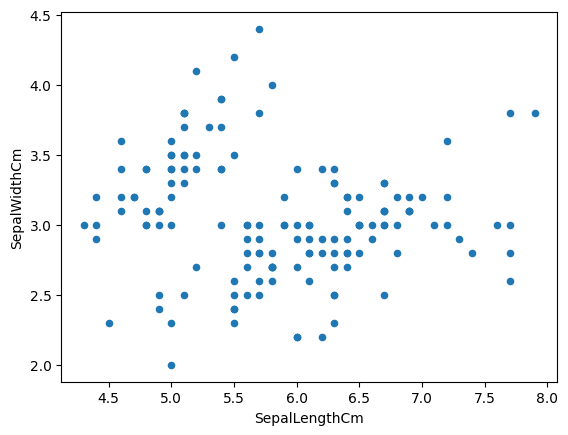

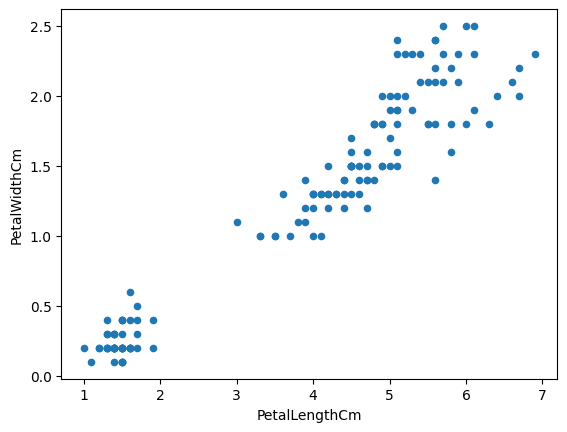

In [7]:
df.plot(kind='scatter', x="SepalLengthCm", y="SepalWidthCm")
df.plot(kind='scatter',x="PetalLengthCm", y="PetalWidthCm")

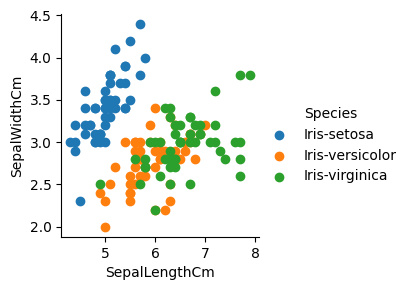

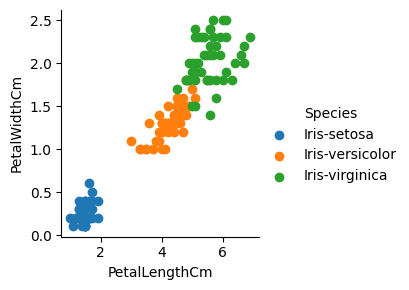

In [8]:
#?
sns.FacetGrid(df,hue="Species").map(plt.scatter,"SepalLengthCm","SepalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species").map(plt.scatter,"PetalLengthCm","PetalWidthCm").add_legend()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

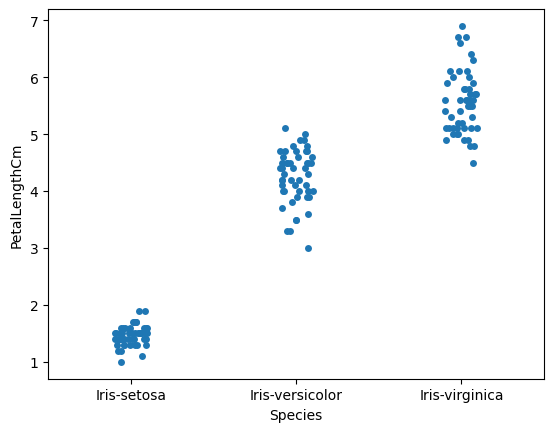

In [9]:
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True)

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

In [11]:
df.drop('Id',axis=1,inplace=True)
X = df.iloc[:,1:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=42)

In [12]:
#KNN ile model tahmini
KNN_model=KNeighborsClassifier(n_neighbors=3) 
KNN_model.fit(X_train,y_train)
prediction=KNN_model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test)*100, 'percent')

The accuracy of the KNN is 97.77777777777777 percent


In [13]:
#Lojistik Regresyon ile model tahmini
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
prediction=log_model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test)*100 ,'percent')

The accuracy of the Logistic Regression is 100.0 percent


In [14]:
#KNN için optimum komşu sayısı bulma
accuracy_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    accuracy_rate.append(metrics.accuracy_score(pred_i,y_test)*100)

Text(0, 0.5, 'Accuracy Rate')

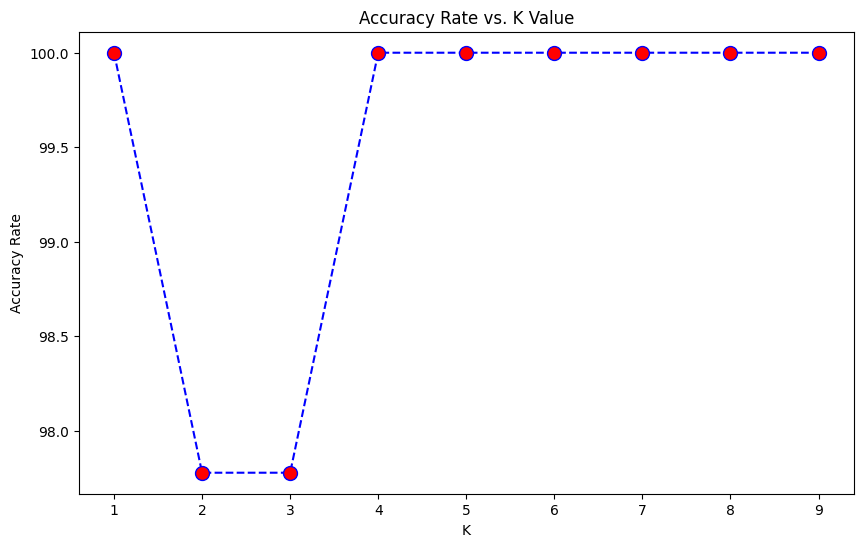

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [26]:
#SVM modeli oluşturalım
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear' , random_state = 0)

#modeli eğitelim
classifier.fit(X_train, y_train)

#Tahmin yapalım
y_pred = classifier.predict(X_test)

In [27]:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Sapma: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.27 %
Standart Sapma: 6.12 %
